In [ ]:
import seaborn as sns
import matplotlib 

import matplotlib.pyplot as plt


import math
from sys import path
path.append('..//modules')
path.append('..//dumps//reg_dmo_pdf')
import time
import pandas as pd
import psycopg2 as pg
from geoalchemy2 import Geometry, WKTElement
from sqlalchemy import create_engine, MetaData, Table
import pandas.io.sql as psql

#create a postgres engine and a pg connection
from modules.db_connector import *
print("DB connecting engine imported")


#print(matplotlib.rcParams.keys())

font = {'family' : 'Roboto', 
        'weight': '300',
        'size'   : 20}


axesfoo = {'labelweight': '300'}
#unified_colors
clr_mean = "red"
clr_mode = "black"
clr_median = "orange"

import matplotlib 
matplotlib.rc('font', **font)
matplotlib.rc('axes', **axesfoo)

#https://medium.com/dunder-data/automatically-wrap-graph-labels-in-matplotlib-and-seaborn-a48740bc9ce
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

    
df_clr.median()

In [2]:
with engine.connect() as con1:
    q1 =     """
  select * from gtlab.sgs_geosites_ta_penetration
    """
    q2 = """
    
    with bar as (
    with foo as (
    select * from gtlab.sgs_geosites_ta_penetration
    left join (select id poi_id, poi_n_reviews, poi_rating from gtlab.sk_pois_activities_tripadvisor_0723_details) pois using (poi_id)
    left join (select id poi_id, * from gtlab.sk_ta_trp_cat_test) trp using (poi_id)
    left join (select id tr_subgroup_5, name trp_5_subgroups  from gtlab.trp_5_subgroups) trp5 using(tr_subgroup_5)
        )
    select * from foo
    )
    (select 'root'::text branch_level, 'Significant Geological Sites' from_node, 'Significant Geological Sites' to_node, count(*) n, sum(poi_n_reviews) poi_n_reviews from bar )
    union all
    (select 'level1'::text branch_level, 'Significant Geological Sites' from_node, trp_3_subclass to_node, count(*) n, sum(poi_n_reviews) weight from bar group by trp_3_subclass order by to_node)
    union all
    (select 'level2'::text branch_level, trp_3_subclass from_node, trp_4_groups to_node, count(*) n, sum(poi_n_reviews) weight from bar group by trp_3_subclass, trp_4_groups  order by from_node, to_node)
	union all
    (select 'level3'::text branch_level, trp_4_groups from_node, poi_name to_node, count(*) n, sum(poi_n_reviews) weight from bar group by trp_3_subclass, trp_4_groups, poi_name order by from_node, to_node)
    """
    df_penetration = pd.read_sql(q2, con=con1)
    con1.close()
df = df_penetration.fillna(0).copy()



        
df_copy = df.copy()
df_copy.at[0, 'parent_share'] = df_copy.at[0, 'poi_n_reviews'] / df_copy.at[0, 'poi_n_reviews']
df_copy.loc[df_copy.query('branch_level == "level1"').index, 'parent_share'] = df_copy.query('branch_level == "level1"')['poi_n_reviews'] / df_copy.query('branch_level == "level1"')['poi_n_reviews'].sum()
df_copy.loc[df_copy.query('branch_level == "level2" and from_node == "Bodies of water"').index, 'parent_share'] = df_copy.query('branch_level == "level2" and from_node == "Bodies of water"')['poi_n_reviews'] / df_copy.query('branch_level == "level2" and from_node == "Bodies of water"')['poi_n_reviews'].sum()
df_copy.loc[df_copy.query('branch_level == "level2" and from_node == "Geosites"').index, 'parent_share'] = df_copy.query('branch_level == "level2" and from_node == "Geosites"')['poi_n_reviews'] / df_copy.query('branch_level == "level2" and from_node == "Geosites"')['poi_n_reviews'].sum()
df_copy.loc[df_copy.query('branch_level == "level2" and from_node == "Outdoor landscapes"').index, 'parent_share'] = df_copy.query('branch_level == "level2" and from_node == "Outdoor landscapes"')['poi_n_reviews'] / df_copy.query('branch_level == "level2" and from_node == "Outdoor landscapes"')['poi_n_reviews'].sum()
df_copy.loc[df_copy.query('branch_level == "level2" and from_node == "Tangible cultural heritage"').index, 'parent_share'] = df_copy.query('branch_level == "level2" and from_node == "Tangible cultural heritage"')['poi_n_reviews'] / df_copy.query('branch_level == "level2" and from_node == "Tangible cultural heritage"')['poi_n_reviews'].sum()
df_copy.loc[df_copy.query('branch_level == "level3" and from_node == "Architectural monuments"').index, 'parent_share'] = df_copy.query('branch_level == "level3" and from_node == "Architectural monuments"')['poi_n_reviews'] / df_copy.query('branch_level == "level3" and from_node == "Architectural monuments"')['poi_n_reviews'].sum()
df_copy.loc[df_copy.query('branch_level == "level3" and from_node == "Canyons"').index, 'parent_share'] = df_copy.query('branch_level == "level3" and from_node == "Canyons"')['poi_n_reviews'] / df_copy.query('branch_level == "level3" and from_node == "Canyons"')['poi_n_reviews'].sum()
df_copy.loc[df_copy.query('branch_level == "level3" and from_node == "Caves"').index, 'parent_share'] = df_copy.query('branch_level == "level3" and from_node == "Caves"')['poi_n_reviews'] / df_copy.query('branch_level == "level3" and from_node == "Caves"')['poi_n_reviews'].sum()
df_copy.loc[df_copy.query('branch_level == "level3" and from_node == "Historical sites"').index, 'parent_share'] = df_copy.query('branch_level == "level3" and from_node == "Historical sites"')['poi_n_reviews'] / df_copy.query('branch_level == "level3" and from_node == "Historical sites"')['poi_n_reviews'].sum()
df_copy.loc[df_copy.query('branch_level == "level3" and from_node == "Other"').index, 'parent_share'] = df_copy.query('branch_level == "level3" and from_node == "Other"')['poi_n_reviews'] / df_copy.query('branch_level == "level3" and from_node == "Other"')['poi_n_reviews'].sum()
df_copy.loc[df_copy.query('branch_level == "level3" and from_node == "Other Bodies of Water"').index, 'parent_share'] = df_copy.query('branch_level == "level3" and from_node == "Other Bodies of Water"')['poi_n_reviews'] / df_copy.query('branch_level == "level3" and from_node == "Other Bodies of Water"')['poi_n_reviews'].sum()
df_copy.loc[df_copy.query('branch_level == "level3" and from_node == "Other geosites"').index, 'parent_share'] = df_copy.query('branch_level == "level3" and from_node == "Other geosites"')['poi_n_reviews'] / df_copy.query('branch_level == "level3" and from_node == "Other geosites"')['poi_n_reviews'].sum()
df_copy.loc[df_copy.query('branch_level == "level3" and from_node == "Other landscapes"').index, 'parent_share'] = df_copy.query('branch_level == "level3" and from_node == "Other landscapes"')['poi_n_reviews'] / df_copy.query('branch_level == "level3" and from_node == "Other landscapes"')['poi_n_reviews'].sum()
df_copy.loc[df_copy.query('branch_level == "level3" and from_node == "Springs"').index, 'parent_share'] = df_copy.query('branch_level == "level3" and from_node == "Springs"')['poi_n_reviews'] / df_copy.query('branch_level == "level3" and from_node == "Springs"')['poi_n_reviews'].sum()
df_copy.loc[df_copy.query('branch_level == "level3" and from_node == "Water falls"').index, 'parent_share'] = df_copy.query('branch_level == "level3" and from_node == "Water falls"')['poi_n_reviews'] / df_copy.query('branch_level == "level3" and from_node == "Water falls"')['poi_n_reviews'].sum()



for i, from_node in zip(df_copy.index, df_copy['from_node']):
    if len(from_node.split(' ')) > 1:
        wrap_from = max([len(x) for x in from_node.split(' ')])
        df_copy.loc[i, 'from_node'] = "\n".join(textwrap.wrap(from_node, wrap_from))
    
    
for i, to_node in zip(df_copy.index, df_copy['to_node']):
    if len(to_node.split(' ')) > 1:
        wrap_to = max([len(x) for x in to_node.split(' ')])
        df_copy.loc[i, 'to_node'] = "\n".join(textwrap.wrap(to_node, wrap_to))





l_shares = list(df_copy['parent_share'])
len(l_shares)

ndx_colors = ['#e1e8fb', '#bfcbee', '#9eb0e5', '#3e5fcc']
clr_list_ndx = []
for x in l_shares:
    if x < 0.25:
        #under 25 %
        x_color = ndx_colors[0]
        #greater thant 25% lower than 50%
        clr_list_ndx.append(x_color)
    elif x >= 0.25 and x < 0.5:
        x_color = ndx_colors[1]
        clr_list_ndx.append(x_color)
        #greater than 50% lower than 75%
    elif x >= 0.5 and x < 0.75:
        x_color = ndx_colors[2]
        clr_list_ndx.append(x_color)
        #greater than 50% or equal to 100%
    elif x >= 0.75 and x <= 1:
        x_color = ndx_colors[3]
        clr_list_ndx.append(x_color)



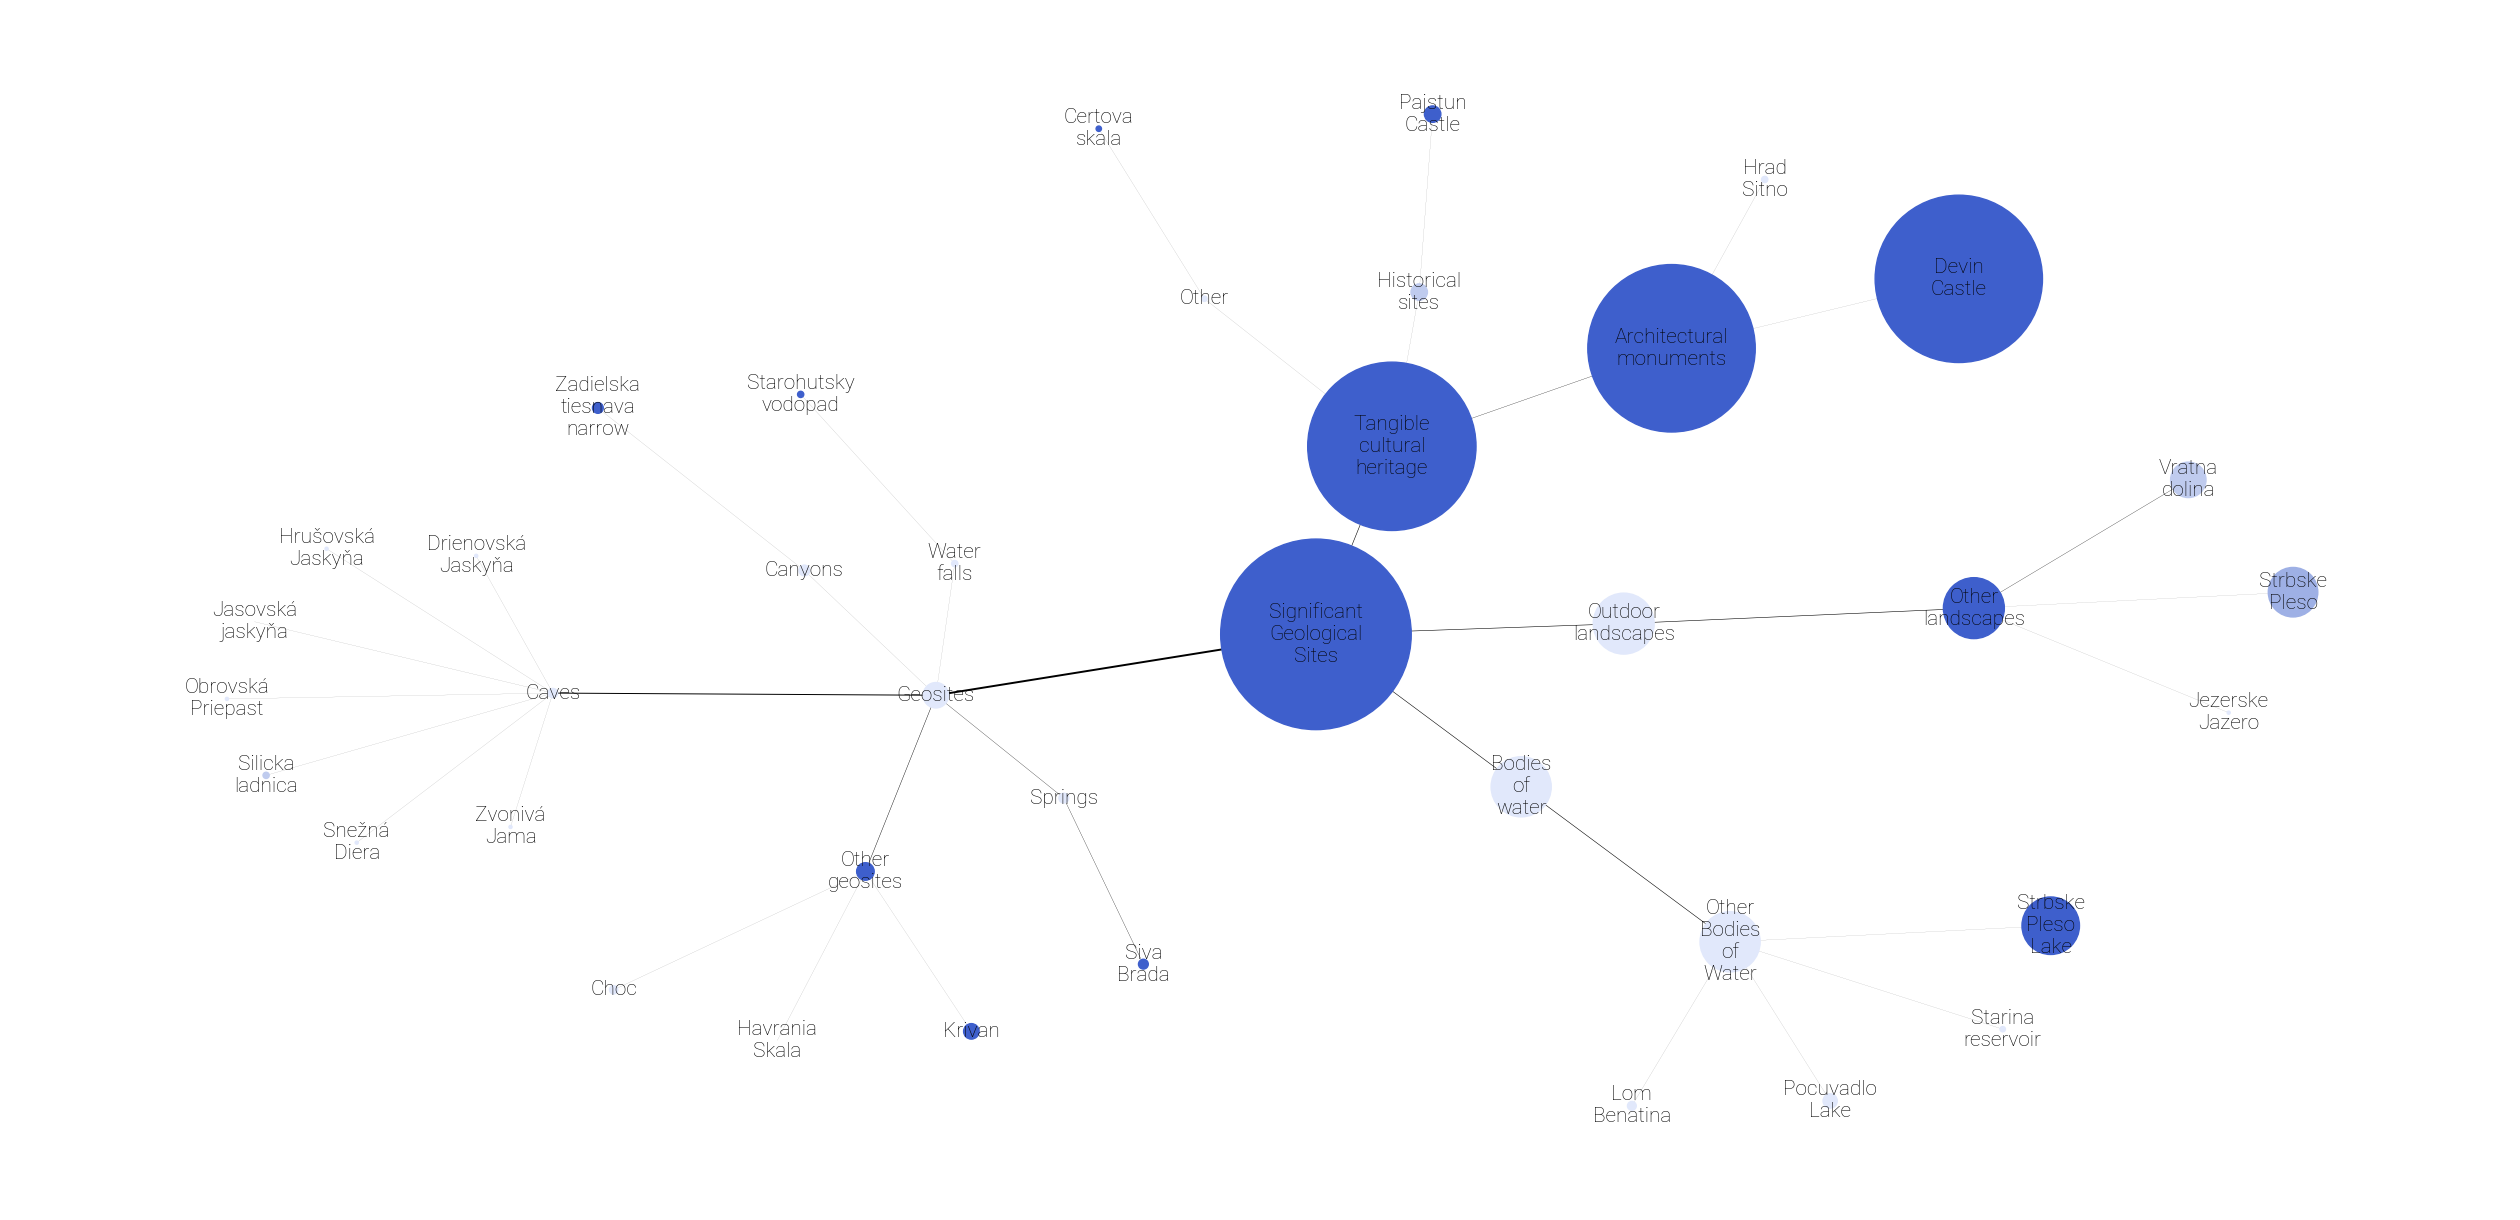

In [4]:
#get all sizes including root's

#exclude edge root -> root
df_nodes = df_copy.query('from_node != to_node')
#obsolete but keep while testing rendering




import pandas as pd
import networkx as nx

#fig = matplotlib.pyplot.figure(figsize=(20, 20))

G = nx.Graph() # Create an empty undirected graph (or nx.DiGraph() for a directed graph)
# Add nodes from the 'source' and 'target' columns
G.add_nodes_from(df_nodes['from_node'])
G.add_nodes_from(df_nodes['to_node'])



# Add edges from the DataFrame
edges = [(row['from_node'], row['to_node']) for index, row in df_nodes.iterrows()]
G.add_edges_from(edges)
df_edges = pd.DataFrame(list(G.edges))
df_edges['idx'] = df_edges.index
df_edges = df_edges.rename(columns={0: 'from_node', 1:'to_node'})
df_edges = pd.merge(df_copy, df_edges, on=['from_node', 'to_node'], how='outer')
edges_weights = []
for n in list(df_edges.sort_values(by=['idx'])['n']):
    if n == 1:
        edge_wdth = 0.05
        edges_weights.append(edge_wdth)
    elif n!=1:
        edge_wdth = n/10
        edges_weights.append(edge_wdth)

df_nodes = pd.DataFrame(list(G.nodes))
df_nodes['nidx'] = df_nodes.index
df_nodes['to_node'] = df_nodes[0]
df_sizes = df_copy.copy()
df_sizes = pd.merge(df_sizes, df_nodes, on='to_node', how='outer')
df_sizes = df_sizes.sort_values('nidx', ascending=True)
sizes_x = [x for x in df_sizes['poi_n_reviews']] 
sizes_x = [x*5 for x in sizes_x]
weigths = [0.25 for x in sizes_x]

#import matplotlib.pyplot as plt
# Draw the graph
pos = nx.kamada_kawai_layout(G) # Define the layout for node positioning
fig = plt.figure(figsize=(25,12)) 
nx.draw(G, pos, with_labels=True, node_size=sizes_x, node_color=clr_list_ndx, font_size=15, font_color='black', font_family='Roboto', font_weight='light', width=edges_weights)
fig.savefig("dumps/exported_figs/kamada_kawai_sgs.svg", bbox_inches="tight")
#matplotlib.pyplot.show()
# Display the graph
#if True: 
    # Save plot to file
#    matplotlib.use("Agg") 
#    fig.savefig("dumps/exported_figs/kamada_kawai_geosites.svg", bbox_inches="tight")
#else:
    # Display interactive viewer
#    matplotlib.pyplot.show()

#plt.show()

#edge width
#node color scale
#f



In [178]:
df_copy

,branch_level,from_node,to_node,n,poi_n_reviews,parent_share
0,root,Significant\nGeological\nSites,Significant\nGeological\nSites,26,3765.0,1.000000
1,level1,Significant\nGeological\nSites,Bodies\nof\nwater,4,375.0,0.099602
2,level1,Significant\nGeological\nSites,Geosites,14,67.0,0.017795
3,level1,Significant\nGeological\nSites,Outdoor\nlandscapes,4,385.0,0.102258
4,level1,Significant\nGeological\nSites,Tangible\ncultural\nheritage,4,2938.0,0.780345
5,level2,Bodies\nof\nwater,Other\nBodies\nof\nWater,4,375.0,1.000000
6,level2,Geosites,Canyons,1,12.0,0.179104
7,level2,Geosites,Caves,7,9.0,0.134328
8,level2,Geosites,Other\ngeosites,3,32.0,0.477612
9,level2,Geosites,Springs,2,10.0,0.149254


In [154]:
list(pd.DataFrame(list(G.nodes)).index)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38]